In [ ]:
import random
import os
from PIL import Image,ImageFilter,ImageDraw
import numpy as np
import h5py
from PIL import ImageStat
import cv2
def load_data(img_path,train = True):
    gt_path = img_path.replace('.jpg','.h5').replace('images','ground_truth')
    img = Image.open(img_path).convert('RGB')
    gt_file = h5py.File(gt_path)
    target = np.asarray(gt_file['density'])
    if train:
        crop_size = (img.size[0]/2,img.size[1]/2)
        dx = int(random.random()*img.size[0]*1./2)
        dy = int(random.random()*img.size[1]*1./2)
        img = img.crop((dx,dy,crop_size[0]+dx,crop_size[1]+dy))
        target = target[dy:crop_size[1]+dy,dx:crop_size[0]+dx]

    
    target = cv2.resize(target,(target.shape[1]/8,target.shape[0]/8),interpolation = cv2.INTER_CUBIC)*64
    
    
    return img,target

In [ ]:
import h5py           #make_dataset.ipynb starts
import scipy.io as io
import PIL.Image as Image
import numpy as np
import scipy.spatial
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from matplotlib import cm as CM
#from image import *
import torch
%matplotlib inline

In [ ]:
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [ ]:
root='/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/'

In [ ]:
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_205.jpg
(798, 1017)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_213.jpg
(749, 1000)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_197.jpg
(600, 800)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_2.jpg
(713, 1024)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_209.jpg
(619, 1000)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_193.jpg
(506, 487)
generate density...
done.
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/train_data/images/IMG_201.jpg
(530, 800)
generate density...
done.
/content/drive/MyDrive/Sh

ValueError: ignored

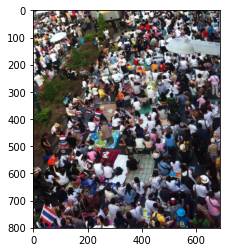

In [ ]:
plt.imshow(Image.open(img_paths[15]))


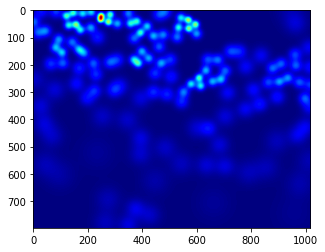

In [ ]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
np.sum(groundtruth)

128.73708

In [ ]:
root='/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/'

In [ ]:
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')

In [ ]:
path_sets = [part_B_train,part_B_test] #for part B
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
        
# creating density map for part_b images

for img_path in img_paths:
    print (img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

done.
/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/train_data/images/IMG_368.jpg
(768, 1024)
generate density...


KeyboardInterrupt: ignored

In [ ]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
import os
import random                   #dataset.py
import torch
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
from image import *
class listDataset(Dataset):
    def __init__(self, root, shape=None, shuffle=True, transform=None,  train=False, seen=0, batch_size=1, num_workers=4):
        if train:
         #   root = root *16
            root = root *4
        random.shuffle(root)

        self.nSamples = len(root)
        self.lines = root
        self.transform = transform
        self.train = train
        self.shape = shape
        self.seen = seen
        self.batch_size = batch_size
        self.num_workers = num_workers
        
        
    def __len__(self):
        return self.nSamples
    def __getitem__(self, index):
        assert index <= len(self), 'index range error' 
        
        img_path = self.lines[index]
        
        img,target = load_data(img_path,self.train)
        img = 255.0 * F.to_tensor(img)

        img[0,:,:]=img[0,:,:]-92.8207477031
        img[1,:,:]=img[1,:,:]-95.2757037428
        img[2,:,:]=img[2,:,:]-104.877445883

        
        # if self.transform is not None:
        #     img = self.transform(img)
        return img,target

In [ ]:
import h5py
import torch                #utils.py
import shutil

def save_net(fname, net):
    with h5py.File(fname, 'w') as h5f:
        for k, v in net.state_dict().items():
            h5f.create_dataset(k, data=v.cpu().numpy())
def load_net(fname, net):
    with h5py.File(fname, 'r') as h5f:
        for k, v in net.state_dict().items():        
            param = torch.from_numpy(np.asarray(h5f[k]))         
            v.copy_(param)
            
def save_checkpoint(state, is_best,task_id, filename='checkpoint.pth.tar'):
    torch.save(state, task_id+filename)
    if is_best:
        shutil.copyfile(task_id+filename, task_id+'model_best.pth.tar')     

In [ ]:
import torch.nn as nn         #model.ipynb
import torch
from torchvision import models
# from utils import save_net,load_net

In [ ]:

class CSRNet(nn.Module):
    def __init__(self, load_weights=False):
        super(CSRNet, self).__init__()
        self.frontend_feat = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512]
        self.backend_feat  = [512, 512, 512,256,128,64]
        self.frontend = make_layers(self.frontend_feat)
        self.backend = make_layers(self.backend_feat,in_channels = 512,dilation = True)
        self.output_layer = nn.Conv2d(64, 1, kernel_size=1)
        if not load_weights:
            mod = models.vgg16(pretrained = True)
            self._initialize_weights()
            for i in range(len(self.frontend.state_dict().items())):

              list(self.frontend.state_dict().items())[i][1].data[:] = list(mod.state_dict().items())[i][1].data[:]
    def forward(self,x):
        x = self.frontend(x)
        x = self.backend(x)
        x = self.output_layer(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.normal_(m.weight, 0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [ ]:
def make_layers(cfg, in_channels = 3,batch_norm=False,dilation = False):
    if dilation:
        d_rate = 2
    else:
        d_rate = 1
    layers = []
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=d_rate,dilation = d_rate)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

In [ ]:
import torch.nn as nn
import torch                              #model.py
from torchvision import models
# from utils import save_net,load_net
class CSRNet(nn.Module):
    def __init__(self, load_weights=False):
        super(CSRNet, self).__init__()
        self.seen = 0
        self.frontend_feat = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512]
        self.backend_feat  = [512, 512, 512,256,128,64]
        self.frontend = make_layers(self.frontend_feat)
        self.backend = make_layers(self.backend_feat,in_channels = 512,dilation = True)
        self.output_layer = nn.Conv2d(64, 1, kernel_size=1)
        if not load_weights:
            mod = models.vgg16(pretrained = True)
            self._initialize_weights()
            for i in range(len(self.frontend.state_dict().items())):
                list(self.frontend.state_dict().items())[i][1].data[:] = list(mod.state_dict().items())[i][1].data[:]
    def forward(self,x):
        x = self.frontend(x)
        x = self.backend(x)
        x = self.output_layer(x)
        return x
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
             #   nn.init.kaiming_normal_(m.weight, mode='fan_out')
                nn.init.normal_(m.weight, std=0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            # elif isinstance(m, nn.Linear):
            #     nn.init.normal_(m.weight, 0, 0.01)
            #     nn.init.constant_(m.bias, 0)


def make_layers(cfg, in_channels = 3,batch_norm=False,dilation = False):
    if dilation:
        d_rate = 2
    else:
        d_rate = 1
    layers = []
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=d_rate,dilation = d_rate)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)  

In [ ]:
model = CSRNet()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


In [ ]:
x = torch.rand((1,3,255,255))


In [ ]:
model(x).shape


torch.Size([1, 1, 31, 31])

In [ ]:
import sys
import os
import warnings                           #train.py
# from model import CSRNet
# from utils import save_checkpoint
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets, transforms
import numpy as np
import argparse
import json
import cv2
#import dataset
import time
parser = argparse.ArgumentParser(description='PyTorch CSRNet')
parser.add_argument('train_json', metavar='TRAIN',
                    help='path to train json')
parser.add_argument('test_json', metavar='TEST',
                    help='path to test json')
parser.add_argument('--pre', '-p', metavar='PRETRAINED', default=None,type=str,
                    help='path to the pretrained model')
parser.add_argument('gpu',metavar='GPU', type=str,
                    help='GPU id to use.')
def main():
    
    global args,best_prec1
    
    best_prec1 = 1e6

    args = parser.parse_args()

    #args.lr = 1e-9
    args.original_lr = 1e-6
    args.lr = 1e-6
    args.batch_size    = 1
    args.momentum      = 0.9
    args.decay         = 1e-4
    args.start_epoch   = 0
   # args.epochs = 200
    args.epochs = 400
    args.steps         = [-1,1,100,150]
    args.scales        = [.01,100,1,1]
    args.workers = 4
    args.seed = time.time()
    args.print_freq = 30
    with open(args.train_json, 'r') as outfile:        
        train_list = json.load(outfile)
    with open(args.test_json, 'r') as outfile:       
        val_list = json.load(outfile)
    
    os.environ['CUDA_VISIBLE_DEVICES'] = args.gpu
    torch.cuda.manual_seed(args.seed)
    
    model = CSRNet()
    
    model = model.cuda()
    
    criterion = nn.MSELoss(size_average=False).cuda()
    
    optimizer = torch.optim.SGD(model.parameters(), args.lr,
                                momentum=args.momentum,
                                weight_decay=args.decay)
    if args.pre:
        if os.path.isfile(args.pre):
            print("=> loading checkpoint '{}'".format(args.pre))
            checkpoint = torch.load(args.pre)
            args.start_epoch = checkpoint['epoch']
            best_prec1 = checkpoint['best_prec1']
          #  load_state_dict(checkpoint['state_dict'])
            model.load_state_dict(checkpoint['state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer'])
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(args.pre, checkpoint['epoch']))
        else:
            print("=> no checkpoint found at '{}'".format(args.pre))
            
    for epoch in range(args.start_epoch, args.epochs):
        
        adjust_learning_rate(optimizer, epoch)
        
        train(train_list, model, criterion, optimizer, epoch)
        prec1 = validate(val_list, model, criterion)
        
        is_best = prec1 < best_prec1
        best_prec1 = min(prec1, best_prec1)
        save_checkpoint({
            'epoch': epoch + 1,
            'arch': args.pre,
            'state_dict': model.state_dict(),
            'best_prec1': best_prec1,
            'optimizer' : optimizer.state_dict(),
        }, is_best)
def train(train_list, model, criterion, optimizer, epoch):
    
    losses = AverageMeter()
    batch_time = AverageMeter()
    data_time = AverageMeter()
    
    
    train_loader = torch.utils.data.DataLoader(
        dataset.listDataset(train_list,
                       shuffle=True,
                       transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ]), 
                       train=True, 
                       seen=model.seen,
                       batch_size=args.batch_size,
                       num_workers=args.workers),
        batch_size=args.batch_size)
   # print('epoch %d, processed %d samples, lr %f' % (epoch, epoch * len(train_loader.dataset), args.lr))
    print('epoch %d, processed %d samples, lr %.10f' % (epoch, epoch * len(train_loader.dataset), args.lr))

    model.train()
    end = time.time()
    
    for i,(img, target)in enumerate(train_loader):
        data_time.update(time.time() - end)
        
        img = img.cuda()
        img = Variable(img)
        output = model(img)
        
        
        
        
        target = target.unsqueeze(0).cuda()
        target = Variable(target)
        
        
        loss = criterion(output, target)

        losses.update(loss.item(), img.size(0))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    
        
        batch_time.update(time.time() - end)
        end = time.time()
        
        if i % args.print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  .format(
                   epoch, i, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses))
    
def validate(val_list, model, criterion):
    print ('begin test')
    test_loader = torch.utils.data.DataLoader(
    dataset.listDataset(val_list,
                   shuffle=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ]),  train=False),
    batch_size=args.batch_size)    
    
    model.eval()
    
    mae = 0
    
    for i,(img, target) in enumerate(test_loader):
        img = img.cuda()
        img = Variable(img)
        output = model(img)
        
        mae += abs(output.data.sum()-target.sum())
        
    mae = mae/len(test_loader)    
    print(' * MAE {mae:.3f} '
              .format(mae=mae))
    return mae    

def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
  #  args.lr = args.lr * (0.1 ** (epoch // 200))


    args.lr = args.original_lr

    for i in range(len(args.steps)):

        scale = args.scales[i] if i < len(args.scales) else 1


        if epoch >= args.steps[i]:
            args.lr = args.lr * scale
            if epoch == args.steps[i]:
                break
        else:
            break
    for param_group in optimizer.param_groups:
        param_group['lr'] = args.lr

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0
    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count    
    
if __name__ == '__main__':
    main()

usage: ipykernel_launcher.py [-h] [--pre PRETRAINED] TRAIN TEST GPU
ipykernel_launcher.py: error: the following arguments are required: TEST, GPU


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
#from model import CSRNet
import torch
from tqdm import tqdm
%matplotlib inline

In [ ]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [ ]:
root='/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/'
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]

In [ ]:
#defining the image path
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
       img_paths.append(img_path)

In [ ]:
model = CSRNet()

In [ ]:
model=model.cuda()

In [ ]:
checkpoint = torch.load('/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_A_final/0model_best.pth.tar')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
       # mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))

# try:

print(mae/len(img_paths))
# except ZeroDivisionError:

# mae = 0
# for i in range(len(img_paths)):
#     img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

#     img[0,:,:]=img[0,:,:]-92.8207477031
#     img[1,:,:]=img[1,:,:]-95.2757037428
#     img[2,:,:]=img[2,:,:]-104.877445883
#     img = img.cuda()
#     #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
#     gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
#     groundtruth = np.asarray(gt_file['density'])
#     output = model(img.unsqueeze(0))
#     mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
#     print(i,mae)
# print(mae/len(img_paths))


0it [00:00, ?it/s]


ZeroDivisionError: ignored

Predicted Count :  148


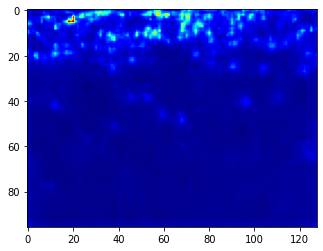

Original Count :  127


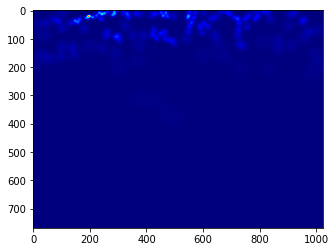

Original Image


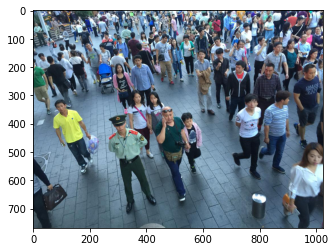

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_112.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
# import scipy.io
# f = scipy.io.loadmat('dataset.mat')
temp = h5py.File('/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/ground_truth/IMG_112.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('/content/drive/MyDrive/ShanghaiTech_Crowd_Counting_Dataset/part_B_final/test_data/images/IMG_112.jpg'))
plt.show()